In [1]:
import pandas as pd

In [2]:
!pip install xlrd


In [3]:
df = pd.read_excel('지역별매장량.xls', sheet_name= 'Data 1', header = 2)

print(df.columns)
time_column = 'Date'
df[time_column] = pd.to_datetime(df[time_column])  # 시간 열을 datetime 형식으로 변환
df_date = df.set_index(time_column)  # 여기서 에러가 발생하지 않도록 문자열로 전달

# 결과 확인
print(df_date.head())

Index(['Date', 'U.S. Total Natural Gas Underground Storage Capacity (MMcf)',
       'Alaska Natural Gas Underground Storage Capacity (MMcf)',
       'Alabama Natural Gas Underground Storage Capacity (MMcf)',
       'Arkansas Natural Gas Underground Storage Capacity (MMcf)',
       'California Natural Gas Underground Storage Capacity (MMcf)',
       'Colorado Natural Gas Underground Storage Capacity (MMcf)',
       'Illinois Natural Gas Underground Storage Capacity (MMcf)',
       'Indiana Natural Gas Underground Storage Capacity (MMcf)',
       'Iowa Natural Gas Underground Storage Capacity (MMcf)',
       'Kansas Natural Gas Underground Storage Capacity (MMcf)',
       'Kentucky Natural Gas Underground Storage Capacity (MMcf)',
       'Louisiana Natural Gas Underground Storage Capacity (MMcf)',
       'Maryland Natural Gas Underground Storage Capacity (MMcf)',
       'Michigan Natural Gas Underground Storage Capacity (MMcf)',
       'Minnesota Natural Gas Underground Storage Capacity 

In [4]:
df

,Date,U.S. Total Natural Gas Underground Storage Capacity (MMcf),Alaska Natural Gas Underground Storage Capacity (MMcf),Alabama Natural Gas Underground Storage Capacity (MMcf),Arkansas Natural Gas Underground Storage Capacity (MMcf),California Natural Gas Underground Storage Capacity (MMcf),Colorado Natural Gas Underground Storage Capacity (MMcf),Illinois Natural Gas Underground Storage Capacity (MMcf),Indiana Natural Gas Underground Storage Capacity (MMcf),Iowa Natural Gas Underground Storage Capacity (MMcf),...,Oklahoma Natural Gas Underground Storage Capacity (MMcf),Oregon Natural Gas Underground Storage Capacity (MMcf),Pennsylvania Natural Gas Underground Storage Capacity (MMcf),Tennessee Natural Gas Underground Storage Capacity (MMcf),Texas Natural Gas Underground Storage Capacity (MMcf),Utah Natural Gas Underground Storage Capacity (MMcf),Virginia Natural Gas Underground Storage Capacity (MMcf),Washington Natural Gas Underground Storage Capacity (MMcf),West Virginia Natural Gas Underground Storage Capacity (MMcf),Wyoming Natural Gas Underground Storage Capacity (MMcf)
0,1988-06-30,8124067,NaN,NaN,36147,459673,82662,953947,114603,311000,...,377189,NaN,805394,NaN,590248,114980,NaN,36400,523132,103831
1,1989-06-30,8120142,NaN,NaN,31447,466818,82662,952279,112045,311000,...,364887,9791.0,805393,NaN,589780,114980,NaN,36400,523132,103830
2,1990-06-30,7794083,NaN,NaN,31277,291678,98999,949914,97332,229700,...,362616,9791.0,640938,NaN,586502,114980,NaN,32100,525138,106130
3,1991-06-30,7993265,NaN,NaN,31277,467678,98999,949914,102246,279700,...,362616,9791.0,640938,NaN,589018,114980,NaN,34100,525138,106130
4,1992-06-30,7931513,NaN,NaN,31277,472108,105790,949721,106176,279700,...,359616,11445.0,669354,NaN,595229,114980,NaN,34100,525206,105668
5,1993-06-30,7988856,NaN,NaN,31277,472108,105790,952388,106676,279700,...,359616,11445.0,664693,NaN,598782,114980,NaN,34100,519286,105668
6,1994-06-30,8042830,NaN,NaN,31277,472108,105583,958968,108621,270200,...,363593,11622.0,658578,NaN,627589,122498,NaN,33900,520457,105668
7,1995-06-30,7952610,NaN,2600.0,38347,472908,108837,905260,113121,270200,...,364593,11622.0,654570,NaN,653420,122498,NaN,33900,466089,105668
8,1996-06-30,7980400,NaN,3280.0,31871,469695,99599,898239,113209,270200,...,395087,11622.0,680006,NaN,672533,121980,NaN,37300,484596,105868
9,1997-06-30,8331879,NaN,3280.0,31871,396430,99599,965565,113209,408200,...,396087,11622.0,684842,NaN,683891,121980,NaN,37300,734157,105868


In [5]:
df_date = df_date.loc['2023-06-30']

In [6]:
print(df_date)


U.S. Total Natural Gas Underground Storage Capacity (MMcf)       9278223.0
Alaska Natural Gas Underground Storage Capacity (MMcf)             83592.0
Alabama Natural Gas Underground Storage Capacity (MMcf)            43600.0
Arkansas Natural Gas Underground Storage Capacity (MMcf)           21972.0
California Natural Gas Underground Storage Capacity (MMcf)        604048.0
Colorado Natural Gas Underground Storage Capacity (MMcf)          141407.0
Illinois Natural Gas Underground Storage Capacity (MMcf)         1019173.0
Indiana Natural Gas Underground Storage Capacity (MMcf)           113549.0
Iowa Natural Gas Underground Storage Capacity (MMcf)              288210.0
Kansas Natural Gas Underground Storage Capacity (MMcf)            282986.0
Kentucky Natural Gas Underground Storage Capacity (MMcf)          221695.0
Louisiana Natural Gas Underground Storage Capacity (MMcf)         741135.0
Maryland Natural Gas Underground Storage Capacity (MMcf)           64000.0
Michigan Natural Gas Unde

In [7]:
# 딕셔너리로 변환
df = pd.DataFrame(list(df_date.items()), columns=["State", "Storage Capacity"])

# 'State' 컬럼에서 주 이름만 추출 (첫 번째 항목만 특별 처리)
df['State'] = df['State'].apply(lambda x: "U.S. Total" if "U.S. Total" in x else x.split()[0])

# 출력 결과 확인
print(df)

           State  Storage Capacity
0     U.S. Total         9278223.0
1         Alaska           83592.0
2        Alabama           43600.0
3       Arkansas           21972.0
4     California          604048.0
5       Colorado          141407.0
6       Illinois         1019173.0
7        Indiana          113549.0
8           Iowa          288210.0
9         Kansas          282986.0
10      Kentucky          221695.0
11     Louisiana          741135.0
12      Maryland           64000.0
13      Michigan         1076066.0
14     Minnesota            7000.0
15   Mississippi          330099.0
16      Missouri           13845.0
17       Montana          376225.0
18      Nebraska           34850.0
19           New           89100.0
20           New          242791.0
21          Ohio          575109.0
22      Oklahoma          372655.0
23        Oregon           36459.0
24  Pennsylvania          763296.0
25     Tennessee            2400.0
26         Texas          863422.0
27          Utah    

In [8]:
!pip install folium geopandas

In [9]:
import folium
import json

geojson_file = "map.geojson"
with open(geojson_file, 'r') as f:
    geo_data = json.load(f)

# 맵 생성
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Choropleth 맵 추가
folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=[(f["properties"]["name"], f["properties"]["density"]) for f in geo_data["features"]],
    columns=["name", "density"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",  # 색상 스케일 (Yellow-Orange-Red)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population Density"
).add_to(m)

# 맵 표시
m

In [10]:
import folium
import json
import pandas as pd

# GeoJSON 파일 읽기
geojson_file = "map.geojson"
with open(geojson_file, 'r') as f:
    geo_data = json.load(f)

# GeoJSON 파일에 데이터 추가 (State 이름을 기준으로)
for feature in geo_data["features"]:
    state_name = feature["properties"]["name"]
    if state_name in df["State"].values:
        # Storage Capacity 값을 GeoJSON의 속성에 추가
        feature["properties"]["storage_capacity"] = df[df["State"] == state_name]["Storage Capacity"].values[0]

# GeoJSON 파일에 저장된 데이터 확인
# GeoJSON 데이터의 첫 번째 항목을 출력하여 저장된 값을 확인
print(geo_data["features"][0]["properties"])

# 맵 생성
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Choropleth 맵 추가
folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=[(f["properties"]["name"], f["properties"].get("storage_capacity", 0)) for f in geo_data["features"]],
    columns=["name", "storage_capacity"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",  # 색상 스케일 (Yellow-Orange-Red)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Storage Capacity"
).add_to(m)

# 맵 표시
m


{'name': 'Alabama', 'density': 94.65, 'storage_capacity': 43600.0}


# 여기부터는 버블맵(텍사수 주에서 우물깊이와 갯수의 정보만들기)

In [31]:
df = pd.read_excel('텍사스주_우물정보_25_02.xls')
df

,District,API Number,Field Name,Field Number,Lease/Gas ID,Lease Name,Well Number,Operator Name,County Name,County Number,...,Abstract Number,Block,O/G/D code,Top Log Interval,Bottom Total Depth,Document Date,Image Size,Scan Date,Log Description,Image path
0,1,1335890,EAGLEVILLE (EAGLE FORD-1),27135700,20637,74 RANCH-GUAJILLO UNIT C,1H,MARATHON OIL EF LLC,ATASCOSA,13,...,12,NaN,O,0,17409,2025-02-26,0.44 MB,2025-02-26,Gamma Ray,3d052884e75b2bbdfbe335fbf24c76_4c3f8fe852bee84...
1,1,47944500,HAWKVILLE (EAGLEFORD SHALE),39744500,292622,STATE OF TEXAS RAFTER O UNIT B,2H,"KILLAM OIL CO., LTD.",WEBB,479,...,3208,NaN,G,3155,20012,2025-02-21,9.51 MB,2025-02-21,Measure While Drilling (MWD),9b6cd48f27eba8fba34a55c4d76a50_35e4205fbbeb23b...
2,1,47944499,HAWKVILLE (EAGLEFORD SHALE),39744500,292131,STATE OF TEXAS RAFTER O UNIT A,1H,"KILLAM OIL CO., LTD.",WEBB,479,...,3208,NaN,G,3150,19340,2025-02-21,9.08 MB,2025-02-21,Measure While Drilling (MWD),91f78176c2b545b25c8a03cefa555f_ca9b1e5ded7ff25...
3,1,12738440,PENA CREEK (GEORGETOWN),70411210,20589,BALFOUR,1,"CML EXPLORATION, LLC",DIMMIT,127,...,153,1.0,O,103,17485,2025-02-21,15.20 MB,2025-02-21,Gamma Ray,175c84b25442614c6b7077511ddeb2_5e999a40ace139c...
4,1,12738426,PEARSALL (AUSTIN CHALK),69981125,20646,DRINKARD,1,"CML EXPLORATION, LLC",DIMMIT,127,...,153,1.0,O,1658,15622,2025-02-21,12.65 MB,2025-02-21,Gamma Ray,e3407786d40eb24d703a7d31dd66b0_ebe4b6b5050180b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,28337154,EAGLEVILLE (EAGLE FORD-1),27135700,16189,NELSON ZELLA,16H,"EOG RESOURCES, INC.",LA SALLE,283,...,557,NaN,O,7900,21861,2025-02-25,0.85 MB,2025-02-25,Gamma Ray,92d86be591e6bf56ee2c350565768c_9ed37997e5cc97b...
76,1,28337153,EAGLEVILLE (EAGLE FORD-1),27135700,16189,NELSON ZELLA,15H,"EOG RESOURCES, INC.",LA SALLE,283,...,557,NaN,O,7900,21828,2025-02-25,0.83 MB,2025-02-25,Gamma Ray,52dbfdcf87f8d78f05a112747ed64b_876631ec35147d1...
77,1,28337153,EAGLEVILLE (EAGLE FORD-1),27135700,16189,NELSON ZELLA,15H,"EOG RESOURCES, INC.",LA SALLE,283,...,557,NaN,O,7900,21828,2025-02-25,3.60 MB,2025-02-25,Gamma Ray,ba480292a4e450c83294136619a730_0302d07c936555a...
78,1,17734463,EAGLEVILLE (EAGLE FORD-1),27135700,20762,LUMBERJACK B,2H,"EOG RESOURCES, INC.",GONZALES,177,...,41,NaN,O,9656,20833,2025-02-25,1.76 MB,2025-02-25,Gamma Ray,77ade1fbab45860a801124548aa974_dcec3bbf0148681...


In [37]:
# 엑셀 파일 경로
file_path = '텍사스주_우물정보_25_02.xls'

# 첫 번째부터 8번째 시트까지 불러와서 리스트로 저장
sheets = pd.read_excel(file_path, sheet_name=None)  # 모든 시트를 딕셔너리 형태로 불러옴
sheet_list = list(sheets.keys())[:13]  # 첫 번째부터 8번째 시트 이름 가져오기

# 모든 시트를 하나의 DataFrame으로 합치기
df = pd.concat([sheets[sheet] for sheet in sheet_list], ignore_index=True)

# 확인
df.head()

,District,API Number,Field Name,Field Number,Lease/Gas ID,Lease Name,Well Number,Operator Name,County Name,County Number,...,Abstract Number,Block,O/G/D code,Top Log Interval,Bottom Total Depth,Document Date,Image Size,Scan Date,Log Description,Image path
0,1,1335890,EAGLEVILLE (EAGLE FORD-1),27135700.0,20637.0,74 RANCH-GUAJILLO UNIT C,1H,MARATHON OIL EF LLC,ATASCOSA,13,...,12,NaN,O,0,17409,2025-02-26,0.44 MB,2025-02-26,Gamma Ray,3d052884e75b2bbdfbe335fbf24c76_4c3f8fe852bee84...
1,1,47944500,HAWKVILLE (EAGLEFORD SHALE),39744500.0,292622.0,STATE OF TEXAS RAFTER O UNIT B,2H,"KILLAM OIL CO., LTD.",WEBB,479,...,3208,NaN,G,3155,20012,2025-02-21,9.51 MB,2025-02-21,Measure While Drilling (MWD),9b6cd48f27eba8fba34a55c4d76a50_35e4205fbbeb23b...
2,1,47944499,HAWKVILLE (EAGLEFORD SHALE),39744500.0,292131.0,STATE OF TEXAS RAFTER O UNIT A,1H,"KILLAM OIL CO., LTD.",WEBB,479,...,3208,NaN,G,3150,19340,2025-02-21,9.08 MB,2025-02-21,Measure While Drilling (MWD),91f78176c2b545b25c8a03cefa555f_ca9b1e5ded7ff25...
3,1,12738440,PENA CREEK (GEORGETOWN),70411210.0,20589.0,BALFOUR,1,"CML EXPLORATION, LLC",DIMMIT,127,...,153,1.0,O,103,17485,2025-02-21,15.20 MB,2025-02-21,Gamma Ray,175c84b25442614c6b7077511ddeb2_5e999a40ace139c...
4,1,12738426,PEARSALL (AUSTIN CHALK),69981125.0,20646.0,DRINKARD,1,"CML EXPLORATION, LLC",DIMMIT,127,...,153,1.0,O,1658,15622,2025-02-21,12.65 MB,2025-02-21,Gamma Ray,e3407786d40eb24d703a7d31dd66b0_ebe4b6b5050180b...


In [39]:
df.tail(5)

,District,API Number,Field Name,Field Number,Lease/Gas ID,Lease Name,Well Number,Operator Name,County Name,County Number,...,Abstract Number,Block,O/G/D code,Top Log Interval,Bottom Total Depth,Document Date,Image Size,Scan Date,Log Description,Image path
1234,8A,41535608,KELLY-SNYDER,48583001.0,3137.0,SACROC UNIT,349-11,KINDER MORGAN PRODUCTION CO LLC,SCURRY,415,...,565.0,3,O,6897,7185,2025-02-03,1.83 MB,2025-02-03,Gamma Ray,e2536048391b79aee49be3503fab2c_a8bda56be432c55...
1235,8A,7933422,COCHRAN (SAN ANDRES),19261666.0,71235.0,BILLY THE KID,2H,"MANZANO, LLC",COCHRAN,79,...,128.0,NaN,O,3800,11622,2025-02-03,3.47 MB,2025-02-03,Gamma Ray,a2a023c327b645a6cbf75e44937f6b_08ec8e68db99806...
1236,8A,7933410,COCHRAN (SAN ANDRES),19261666.0,70984.0,RED CLOUD,3H,"MANZANO, LLC",COCHRAN,79,...,189.0,Y,O,5015,11163,2025-02-03,3.37 MB,2025-02-03,Gamma Ray,cf6bbbe912ceb309444be28d8501ad_9abc6b9ff056a64...
1237,8A,15330248,WILDCAT,20001.0,70436.0,MATHIS-CARTHEL,1,GORDY OIL COMPANY,FLOYD,153,...,2225.0,D2,O,4300,10080,2025-02-03,3.68 MB,2025-02-03,Other,5e8dbbeed0c8bd99cf5b67cfe34e8b_b6e6204bf4d7b17...
1238,8A,10732190,HOOPLE (CLEAR FORK),42499500.0,68048.0,AMOCO-COLLIER ESTATE,20,BRIDWELL OIL CO.,CROSBY,107,...,954.0,2,O,0,4187,2025-02-22,6.89 MB,2025-02-22,Neutron,aac26f49961e5950fa46e1b216edba_6f34d1573ea4da3...


In [41]:
# 원하는 변수(컬럼)만 추출
df_selected = df[['County Name', 'Bottom Total Depth']]

# 앞부분과 뒷부분 데이터 확인
print(df_selected.head())  # 처음 5개 행
print(df_selected.tail())  # 마지막 5개 행


  County Name  Bottom Total Depth
0    ATASCOSA               17409
1        WEBB               20012
2        WEBB               19340
3      DIMMIT               17485
4      DIMMIT               15622
     County Name  Bottom Total Depth
1234      SCURRY                7185
1235     COCHRAN               11622
1236     COCHRAN               11163
1237       FLOYD               10080
1238      CROSBY                4187


In [45]:
# 'Count' 추가 (County Name 기준 그룹화)
df_grouped = df_selected.groupby('County Name', as_index=False).agg(
    Count=('Bottom Total Depth', 'count'),  # 같은 County Name의 개수
    Bottom_Total_Depth=('Bottom Total Depth', 'mean')  # 같은 County Name의 평균
)

# 확인
print(df_grouped.head())  # 처음 5개
print(df_grouped.tail())  # 마지막 5개


  County Name  Count  Bottom_Total_Depth
0    ANDERSON      4        10703.000000
1     ANDREWS     16        11747.500000
2      ARCHER     18         4506.333333
3    ATASCOSA     14        17589.714286
4         BEE      2        23334.000000
   County Name  Count  Bottom_Total_Depth
90     WINKLER     13         9490.846154
91        WISE      8        14551.125000
92      YOAKUM      9         8151.222222
93       YOUNG     13         2731.538462
94      ZAVALA      2         1855.000000


# 난 성공하지 못했다 다음으로 넘어가자

In [40]:
import pandas as pd

# 특정 시트만 로드 (2번째 행을 컬럼명으로 설정)
sheets = ["Anadarko Region", "Eagle Ford Region", "Haynesville Region", "Permian Region"]
df_dict = pd.read_excel('생산분지.xlsx', sheet_name=sheets, header=1)  # header=1로 설정

# 각 시트에 'Region' 컬럼 추가
for region in df_dict:
    df_dict[region]['Region'] = region  # 시트 이름을 'Region' 컬럼에 추가

# 모든 시트를 하나의 데이터프레임으로 합치기
df = pd.concat(df_dict.values(), ignore_index=True)

# 'Month', 'Total production', 'Region' 컬럼만 선택
df_mon_pro = df[['Month', 'Total production', 'Region']]
df_mon_pro

,Month,Total production,Region
0,2007-01-01,126398.0,Anadarko Region
1,2007-02-01,134177.2,Anadarko Region
2,2007-03-01,137515.5,Anadarko Region
3,2007-04-01,141463.4,Anadarko Region
4,2007-05-01,144206.1,Anadarko Region
...,...,...,...
835,2024-02-01,6157509.4,Permian Region
836,2024-03-01,6152235.3,Permian Region
837,2024-04-01,6157013.3,Permian Region
838,2024-05-01,6168529.1,Permian Region


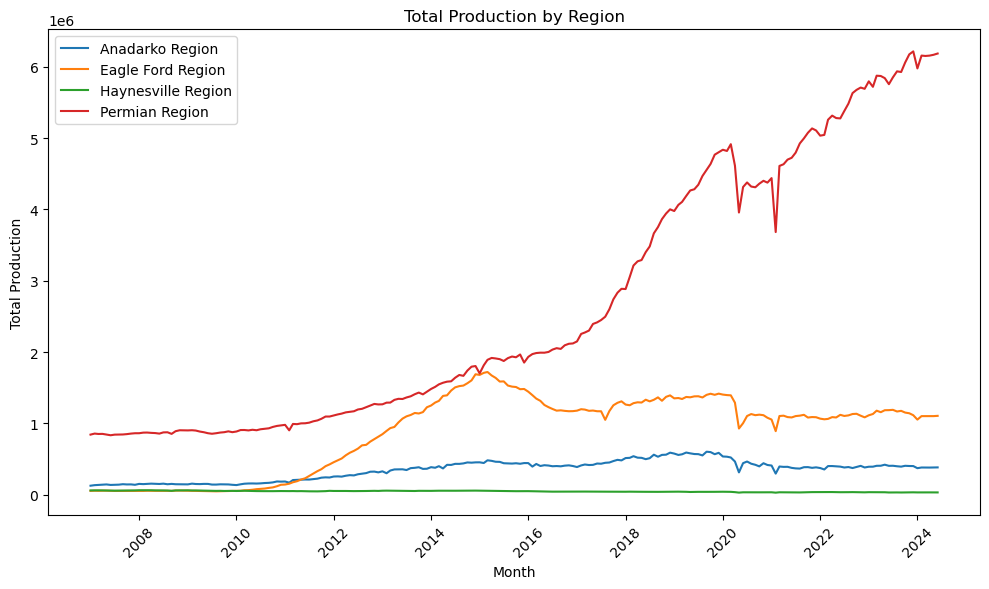

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 특정 시트만 로드 (2번째 행을 컬럼명으로 설정)
sheets = ["Anadarko Region", "Eagle Ford Region", "Haynesville Region", "Permian Region"]
df_dict = pd.read_excel('생산분지.xlsx', sheet_name=sheets, header=1)  # header=1로 설정

# 각 시트에 'Region' 컬럼 추가
for region in df_dict:
    df_dict[region]['Region'] = region  # 시트 이름을 'Region' 컬럼에 추가

# 모든 시트를 하나의 데이터프레임으로 합치기
df = pd.concat(df_dict.values(), ignore_index=True)

# 'Month', 'Total production', 'Region' 컬럼만 선택
df_mon_pro = df[['Month', 'Total production', 'Region']]

# 'Month'를 datetime 형식으로 변환 (필요 시)
df_mon_pro.loc[:, 'Month'] = pd.to_datetime(df_mon_pro['Month'], format='%Y-%m')

# 각 지역별로 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 지역에 대해 선 그래프 그리기
for region in df_mon_pro['Region'].unique():
    region_data = df_mon_pro[df_mon_pro['Region'] == region]
    plt.plot(region_data['Month'], region_data['Total production'], label=region)

# 그래프 제목 및 축 레이블 설정
plt.title('Total Production by Region')
plt.xlabel('Month')
plt.ylabel('Total Production')

# 범례 추가
plt.legend()

# 그래프 표시
plt.xticks(rotation=45)  # x축 날짜 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()


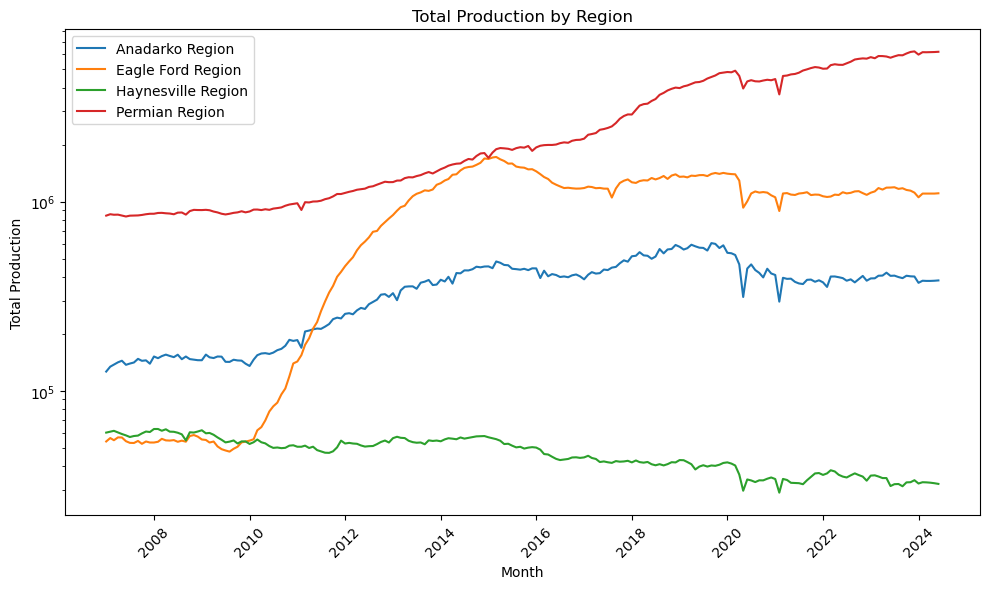

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 특정 시트만 로드 (2번째 행을 컬럼명으로 설정)
sheets = ["Anadarko Region", "Eagle Ford Region", "Haynesville Region", "Permian Region"]
df_dict = pd.read_excel('생산분지.xlsx', sheet_name=sheets, header=1)  # header=1로 설정

# 각 시트에 'Region' 컬럼 추가
for region in df_dict:
    df_dict[region]['Region'] = region  # 시트 이름을 'Region' 컬럼에 추가

# 모든 시트를 하나의 데이터프레임으로 합치기
df = pd.concat(df_dict.values(), ignore_index=True)

# 'Month', 'Total production', 'Region' 컬럼만 선택
df_mon_pro = df[['Month', 'Total production', 'Region']]

# 'Month'를 datetime 형식으로 변환 (필요 시)
df_mon_pro.loc[:, 'Month'] = pd.to_datetime(df_mon_pro['Month'], format='%Y-%m')

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 지역에 대해 선 그래프 그리기
for region in df_mon_pro['Region'].unique():
    region_data = df_mon_pro[df_mon_pro['Region'] == region]
    plt.plot(region_data['Month'], region_data['Total production'], label=region)

# 그래프 제목 및 축 레이블 설정
plt.title('Total Production by Region')
plt.xlabel('Month')
plt.ylabel('Total Production')

# y축을 로그 스케일로 설정 (선택 사항)
plt.yscale('log')

# 범례 추가
plt.legend()

# 그래프 표시
plt.xticks(rotation=45)  # x축 날짜 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()


# 마지막 시간/가격 차트 만들자

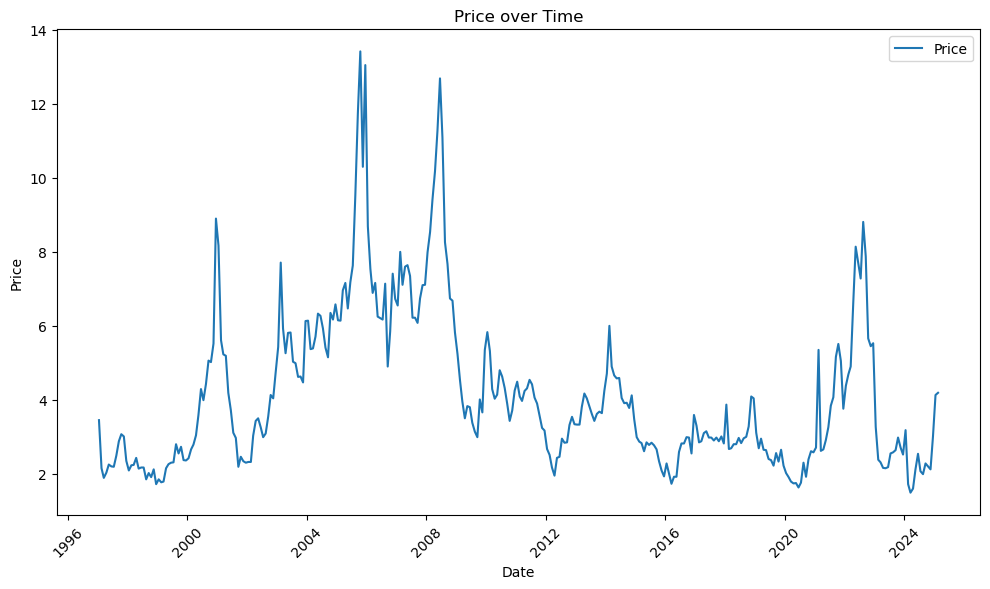

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 두 번째 시트를 불러오고 세 번째 행을 컬럼명으로 설정
df = pd.read_excel('RNGWHHDm.xls', sheet_name=1, header=2)

# 두 번째 컬럼명을 'price'로 변경
df.columns = [df.columns[0], 'price'] + list(df.columns[2:])

# 'Date' 컬럼을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 날짜를 x축, 가격을 y축으로 선 그래프 그리기
plt.plot(df['Date'], df['price'], label='Price')

# 그래프 제목 및 축 레이블 설정
plt.title('Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# x축 날짜 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()
